# Titanic - Machine Learning from Disaster

## Kaggle API install

In [1]:
# !pip install kaggle

In [2]:
# !kaggle competitions list

In [3]:
# !kaggle competitions download titanic

## Overview

[Start here!](https://www.kaggle.com/competitions/titanic/overview) Predict survival on the Titanic and get familiar with ML basics

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

In [4]:
import numpy as np
import pandas as pd

## Импорт данных

In [15]:
df = pd.read_csv('data/train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Анализ данных

### Описание данных

| Variable | Definition                                  | Key                                            |
|----------|---------------------------------------------|------------------------------------------------|
| survival | Survival	                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                                | 	1 = 1st, 2 = 2nd, 3 = 3rd                     |
| sex	     | Sex                                         |                                                |	
| Age      | 	Age in years                               |                                                |	
| sibsp    | 	# of siblings / spouses aboard the Titanic |                                                |	
| parch    | 	# of parents / children aboard the Titanic |                                                |	
| ticket   | 	Ticket number                              |                                                |	
| fare     | 	Passenger fare                             |                                                |	
| cabin    | 	Cabin number                               |                                                |	
| embarked | 	Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes
**pclass**: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

**Sibling** = brother, sister, stepbrother, stepsister

**Spouse** = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

**Parent** = mother, father

**Child** = daughter, son, stepdaughter, stepson

**Some** children travelled only with a nanny, therefore parch=0 for them.


In [16]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
PassengerId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Survived,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1
Pclass,3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)","Sandstrom, Miss. Marguerite Rut","Bonnell, Miss. Elizabeth","Saundercock, Mr. William Henry","Andersson, Mr. Anders Johan","Vestrom, Miss. Hulda Amanda Adolfina","Hewlett, Mrs. (Mary D Kingcome)","Rice, Master. Eugene","Williams, Mr. Charles Eugene","Vander Planke, Mrs. Julius (Emelia Maria Vande...","Masselmani, Mrs. Fatima"
Sex,male,female,female,female,male,male,male,male,female,female,female,female,male,male,female,female,male,male,female,female
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,4.0,58.0,20.0,39.0,14.0,55.0,2.0,NaN,31.0,NaN
SibSp,1,1,0,1,0,0,0,3,0,1,1,0,0,1,0,0,4,0,1,0
Parch,0,0,0,0,0,0,0,1,2,0,1,0,0,5,0,0,1,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,PP 9549,113783,A/5. 2151,347082,350406,248706,382652,244373,345763,2649
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,16.7,26.55,8.05,31.275,7.8542,16.0,29.125,13.0,18.0,7.225


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

> Дисбаланс невысокий

In [20]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [21]:
df.Age.notna().value_counts()

Age
True     714
False    177
Name: count, dtype: int64

In [22]:
df[df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


### Возраст  - 177 пропусков

> Если возраст не указан м.б. младенец и есть корреляция с суммой  

In [23]:
df[((df.Fare == 0) & (df.Pclass == 3)) & df.Age.notna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


### Проверка на корреляцию

In [24]:
df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(method='pearson')

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


## Обработка данных

### Разделение на выборки 

In [25]:
from sklearn.model_selection import train_test_split

In [29]:
target = df['Survived']
features = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [31]:
X_train.shape, X_test.shape

((596, 7), (295, 7))

In [32]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
6,1,male,54.0,0,0,51.8625,S
718,3,male,NaN,0,0,15.5000,Q


## Создание конвейера

План:

1. Численные:
 - Age - заполнение пропусков
2. Категорийный:
 - Embarked, Sex - Кодирование

In [45]:
import pandas as pd
from sklearn.compose import ColumnTransformer

from sklearn.impute import KNNImputer, SimpleImputer, KNNImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier


### Преобразование категорийных переменных

In [43]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore')
ord_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
pipe_cat = Pipeline([('encoder', ord_encoder)])

res_cat = pipe_cat.fit_transform(X_train[['Embarked']])

res_df_cat = pd.DataFrame(res_cat, columns=pipe_cat.get_feature_names_out())
res_df_cat


,Embarked
0,2.0
1,1.0
2,0.0
3,0.0
4,2.0
...,...
591,2.0
592,2.0
593,2.0
594,2.0


### Заполнение пропусков

In [160]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)

In [161]:
knn_imputer.fit(df)

KNNImputer()

In [162]:
knn_imputer.get_feature_names_out()

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
      dtype=object)

In [164]:
df1 = pd.DataFrame(knn_imputer.transform(df), columns=knn_imputer.get_feature_names_out())

In [165]:
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2.0,1.0,27.0,0.0,0.0,13.0000,2.0
887,1.0,0.0,19.0,0.0,0.0,30.0000,2.0
888,3.0,0.0,26.8,1.0,2.0,23.4500,2.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,0.0


### Итоговый конвейер

In [56]:
ord_encoder = OrdinalEncoder()
pipe_cat = Pipeline([('encoder', ord_encoder)])

knn_imputer = KNNImputer(n_neighbors=5)
pipe_num = Pipeline([('knn', knn_imputer)])

col_transformer = ColumnTransformer([('cat_preproc', pipe_cat, [x for x in ['Embarked', 'Sex']]),
                                     ('num_imputer', pipe_num, ['Age'])])

model = DecisionTreeClassifier(random_state=0)

final_pipe = Pipeline([('preproc', col_transformer),
                       ('model', model)
                       ])

In [57]:
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('cat_preproc',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Embarked', 'Sex']),
                                                 ('num_imputer',
                                                  Pipeline(steps=[('knn',
                                                                   KNNImputer())]),
                                                  ['Age'])])),
                ('model', DecisionTreeClassifier(random_state=0))])

In [60]:
y_pred = final_pipe.predict(X_test)

In [62]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [59]:

preds

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0])

## Обучение модели

### Обучение модели

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

clf = DecisionTreeClassifier(random_state=0)

In [220]:
score = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(score, np.mean(score))

[0.73333333 0.76666667 0.68333333 0.76666667 0.81666667 0.68333333
 0.72881356 0.83050847 0.76271186 0.79661017] 0.756864406779661


In [226]:
clf = DecisionTreeClassifier(random_state=0, max_depth=3)

In [227]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

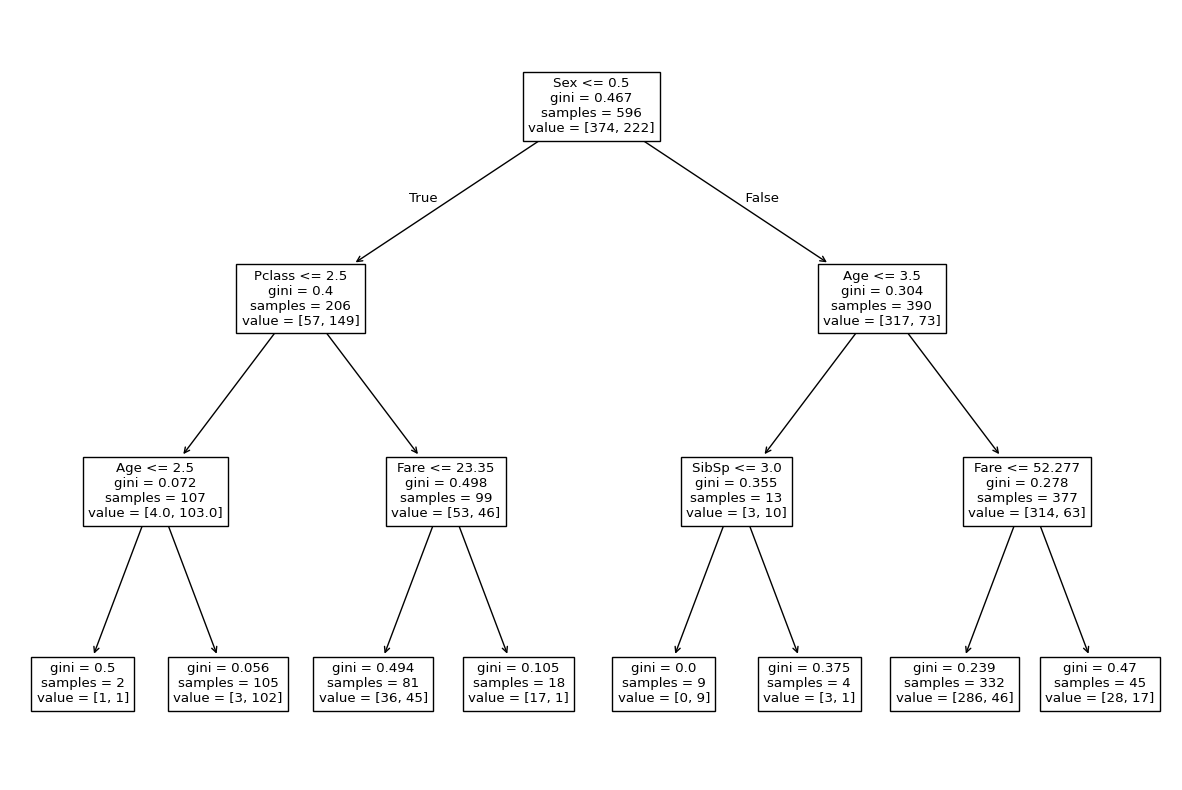

In [241]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 7))
tree.plot_tree(clf, ax=ax, feature_names=X_train.columns)

plt.show()

TypeError: got an unexpected keyword argument 'figsize'

### Оценка результатов

In [171]:
clf.score(X_train, y_train)

0.9798657718120806

In [172]:
clf.score(X_test, y_test)

0.7423728813559322

In [173]:
prediction = clf.predict(X_test)


In [174]:
from sklearn.metrics import classification_report, f1_score


In [175]:
f1_score(y_test, prediction)

0.6859504132231405

In [176]:
print(classification_report(y_test, prediction, target_names=['Dead', 'Save']))

              precision    recall  f1-score   support

        Dead       0.79      0.78      0.78       175
        Save       0.68      0.69      0.69       120

    accuracy                           0.74       295
   macro avg       0.73      0.73      0.73       295
weighted avg       0.74      0.74      0.74       295



## Предсказание на реальных данных

In [195]:
df_ground = pd.read_csv('data/test.csv')
df_ground.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [196]:
df_submission = pd.read_csv('data/gender_submission.csv')
df_submission.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [197]:
df_ground['Sex'] = le.fit_transform(df_ground.Sex)
df_ground['Embarked'] = le.fit_transform(df_ground.Embarked)

In [198]:
df_ground.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [199]:
df_ground.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB


In [200]:
df_ground1 = pd.DataFrame(
    knn_imputer.transform(df_ground[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]),
    columns=knn_imputer.get_feature_names_out())

In [201]:
df_ground.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [202]:
df_ground1['Survived'] = clf.predict(df_ground1)


In [203]:
df_ground1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1.0,34.5,0.0,0.0,7.8292,1.0,0
1,3.0,0.0,47.0,1.0,0.0,7.0000,2.0,1
2,2.0,1.0,62.0,0.0,0.0,9.6875,1.0,0
3,3.0,1.0,27.0,0.0,0.0,8.6625,2.0,0
4,3.0,0.0,22.0,1.0,1.0,12.2875,2.0,0
...,...,...,...,...,...,...,...,...
413,3.0,1.0,25.7,0.0,0.0,8.0500,2.0,0
414,1.0,0.0,39.0,0.0,0.0,108.9000,0.0,1
415,3.0,1.0,38.5,0.0,0.0,7.2500,2.0,0
416,3.0,1.0,25.7,0.0,0.0,8.0500,2.0,0


In [214]:

df_all = pd.concat([df_ground[['PassengerId']], df_ground1], axis=1)

In [215]:
df_all

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3.0,1.0,34.5,0.0,0.0,7.8292,1.0,0
1,893,3.0,0.0,47.0,1.0,0.0,7.0000,2.0,1
2,894,2.0,1.0,62.0,0.0,0.0,9.6875,1.0,0
3,895,3.0,1.0,27.0,0.0,0.0,8.6625,2.0,0
4,896,3.0,0.0,22.0,1.0,1.0,12.2875,2.0,0
...,...,...,...,...,...,...,...,...,...
413,1305,3.0,1.0,25.7,0.0,0.0,8.0500,2.0,0
414,1306,1.0,0.0,39.0,0.0,0.0,108.9000,0.0,1
415,1307,3.0,1.0,38.5,0.0,0.0,7.2500,2.0,0
416,1308,3.0,1.0,25.7,0.0,0.0,8.0500,2.0,0
